# Music listening history analysis

Import required packages

In [1]:
import lfmxtractplus.export_data as lf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import calmap as cm
from IPython.display import display, HTML

%matplotlib inline


initialize lfmxtractplus with config.yaml

In [2]:
lf.initialize('C:\\Users\Madhan\PycharmProjects\lfm4pandas\config.yaml')

https://accounts.spotify.com/authorize?client_id=c6df0ec4beda4f589b5984801224bfd6&response_type=code&redirect_uri=https%3A%2F%2Fexample.com%2Fcallback%2F
Paste the above link into your browser, then paste the redirect url here: https://example.com/callback/?code=AQCqGL_JrcWYmsg0S1SSE8ySV9qj6VkOwg3FjKv50pk461aus0PxrO5OdUoQkczsXUrrHc3O9GbiZ9hCeeO0cg4mg0Etz03cPfb5dIe9Zqk2oJe7jX4t2b0NgVHKFHJcxuLewUhbwAA4MDnd7T-8VE4N7VWiAPhdLIemQZ_Fa6L0N4YpAyqm-uoDivuy4OkT1MI7qoA


Get listening history from last.fm and enrich with spotify audio features

In [3]:
scrobbles_dict = lf.generate_dataset(lfusername='madhan_001', pages=10)
scrobbles_df = scrobbles_dict['complete']


Fetching data from last.fm for user madhan_001

15930 total tracks scrobbled by the user

80 total pages to retrieve


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [04:25<00:00,  3.46s/it]




Fetching SpotifyID for tracks


100%|██████████████████████████████████████████████████████████████████████████████| 1868/1868 [08:59<00:00,  3.42it/s]



tracks without spotifyID : 18

Fetching audio features for tracks


100%|██████████████████████████████████████████████████████████████████████████████| 1868/1868 [04:08<00:00,  7.41it/s]


tracks without audio features : 18


Display extracted data

In [4]:
print("Plays by timestamp")
display(HTML(scrobbles_df.head(5).to_html()))

Plays by timestamp


,timestamp,datetime,artist_name,artist_mbid,album_name,album_mbid,track_name,track_mbid,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
0,1562584002,2019-07-08 16:36:42+05:30,MISSIO,ae5af627-ccd6-4db5-974d-83da8e32e705,Rad Drugz,,Rad Drugz,3c897bb5-8f82-4be9-a6e8-d91afa336f7f,16,0u2A867SnSHy7JOmQtNA3x,229648.0,48.0,indie poptimism,0.612,0.886,7.0,-5.078,1.0,0.0325,0.019700,0.0824,0.000003,0.579,109.025
1,1562583773,2019-07-08 16:32:53+05:30,MISSIO,ae5af627-ccd6-4db5-974d-83da8e32e705,The Darker the Weather // The Better the Man,,I See You,a3f4279f-ef61-421d-8a88-6596241fab1b,6,3EqHFfCSbX4Z1pX8JQ0c0r,228735.0,63.0,indie poptimism,0.461,0.766,1.0,-6.875,1.0,0.0566,0.000484,0.0884,0.000057,0.399,169.957
2,1562583545,2019-07-08 16:29:05+05:30,MISSIO,ae5af627-ccd6-4db5-974d-83da8e32e705,Rad Drugz,,Rad Drugz,3c897bb5-8f82-4be9-a6e8-d91afa336f7f,16,0u2A867SnSHy7JOmQtNA3x,229648.0,48.0,indie poptimism,0.612,0.886,7.0,-5.078,1.0,0.0325,0.019700,0.0824,0.000003,0.579,109.025
3,1562583284,2019-07-08 16:24:44+05:30,All Time Low,62162215-b023-4f0e-84bd-1e9412d5b32c,Future Hearts,0573c7a9-c6bc-48dd-9939-673a64c8dd96,Something's Gotta Give,0f3538e0-2d8c-4d8b-9541-c6ccfa586db9,29,6OPoF9qiuV2dNfJ44w3X4M,189418.0,57.0,neon pop punk,0.496,0.913,4.0,-3.286,1.0,0.0448,0.010100,0.1180,0.000000,0.675,165.981
4,1562583101,2019-07-08 16:21:41+05:30,MØ,3ab2ee23-1c2f-458c-9c8c-ca4844729120,Blur (feat. Foster The People),,Blur (Feat. Foster The People),,22,653SgdD6rQ9YPtsqRgQVzm,181961.0,63.0,dance pop,0.616,0.809,1.0,-4.775,0.0,0.0330,0.014800,0.7180,0.000000,0.468,140.007


In [5]:
library_df = scrobbles_dict['library']
display(HTML(library_df.head(5).to_html()))


,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
0,5 Seconds of Summer,She Looks So Perfect,1,1gugDOSMREb34Xo0c1PlxM,202496.0,68.0,boy band,0.493,0.956,1.0,-4.221,0.0,0.1380,0.000668,0.416,0.000000,0.470,160.006
1,5 Seconds of Summer,Voodoo Doll,1,6NfZsnrGYkMSZhDBZfovNN,197483.0,53.0,boy band,0.469,0.977,2.0,-4.969,1.0,0.1880,0.009870,0.351,0.000000,0.332,144.167
2,5 Seconds of Summer,Want You Back,1,2vHfabj6nFebekTYODqntl,173081.0,70.0,boy band,0.618,0.867,0.0,-4.915,1.0,0.0439,0.006990,0.202,0.000001,0.579,98.030
3,5 Seconds of Summer,Youngblood,48,2iUXsYOEPhVqEBwsqP70rE,203417.0,84.0,boy band,0.596,0.854,7.0,-5.114,0.0,0.4630,0.016900,0.124,0.000000,0.152,120.274
4,88 Fingers Louie,100 Proof,1,5rDjaUk0Bai4fdqN3y3Ezm,150490.0,40.0,chicago hardcore,0.495,0.987,5.0,-2.719,1.0,0.0457,0.000006,0.121,0.000077,0.536,115.892


Unmapped tracks

In [6]:
unmapped_track_df = lf.unmapped_tracks(library_df)
display(HTML(unmapped_track_df.to_html()))
#unmapped_track_df.to_csv("unmappable.tsv", sep='\t')

,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
32,Alessia Cara,"How Far I'll Go - From ""Moana""",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Avicii,I Could Be The One (Avicii Vs. Nicky Romero) -...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,BABYMETAL,Head Bangya!!,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,Cage the Elephant,Ain't No Rest for the Wicked - Original Version,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,Cansei de Ser Sexy,Off the Hook,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,Eminem ft Ed Sheeran,River,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,Ke$ha,Animal,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,Ke$ha,TiK ToK,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,Kyary Pamyu Pamyu,にんじゃりばんばん,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,Ladybaby,Hoshinonaisora,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping rows with unmapped tracks from scrobbles_df

In [7]:
scrobbles_df = scrobbles_df[pd.notnull(scrobbles_df['trackID'])]
display(HTML(lf.unmapped_tracks(scrobbles_df).head(5).to_html()))

,timestamp,datetime,artist_name,artist_mbid,album_name,album_mbid,track_name,track_mbid,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo


Dropping rows with unmapped tracks from library_df

In [8]:
library_df = library_df[pd.notnull(library_df['trackID'])]
display(HTML(lf.unmapped_tracks(library_df).head(5).to_html()))

,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo


creating artist_df to get number of plays from each artist

In [9]:
artist_df = scrobbles_df.groupby(['artist_name']).size().reset_index()
artist_df.rename(columns={0: 'frequency'}, inplace=True)
artist_df.set_index(['artist_name'], inplace=True)
artist_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(artist_df.head(5).to_html()))

,frequency
artist_name,
Linkin Park,734
Melanie Martinez,567
Phoebe Ryan,505
Pierce The Veil,500
Neck Deep,497


plotting barplot for top 20 artists

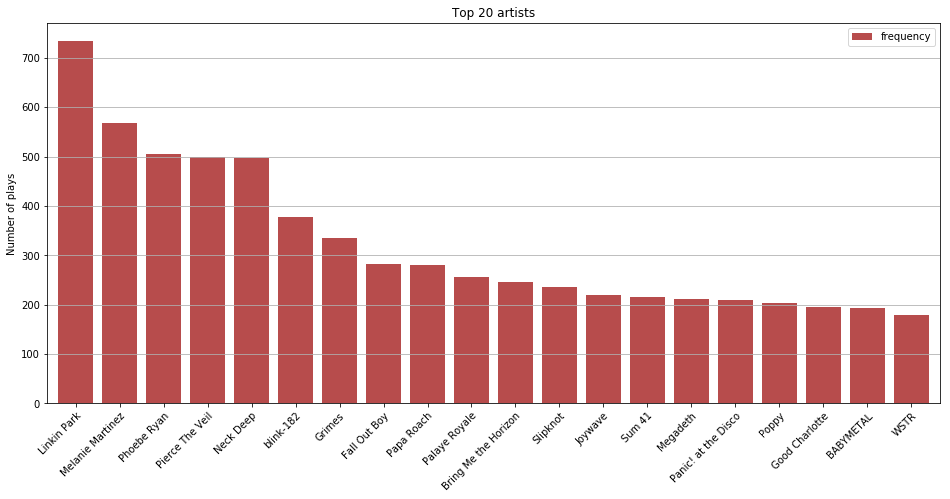

In [10]:
ax = artist_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(artist_df.index,rotation=45, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 artists')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

creating artist_df to get number of plays from each artist

In [11]:
track_df = scrobbles_df.groupby(['track_name']).size().reset_index()
track_df.rename(columns={0: 'frequency'}, inplace=True)
track_df.set_index(['track_name'], inplace=True)
track_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(track_df.head(5).to_html()))

,frequency
track_name,
Besitos,154
Pin,116
Soap,105
Where Do We Go When We Go,98
Bulls in the Bronx,97


plotting barplot for top 20 tracks

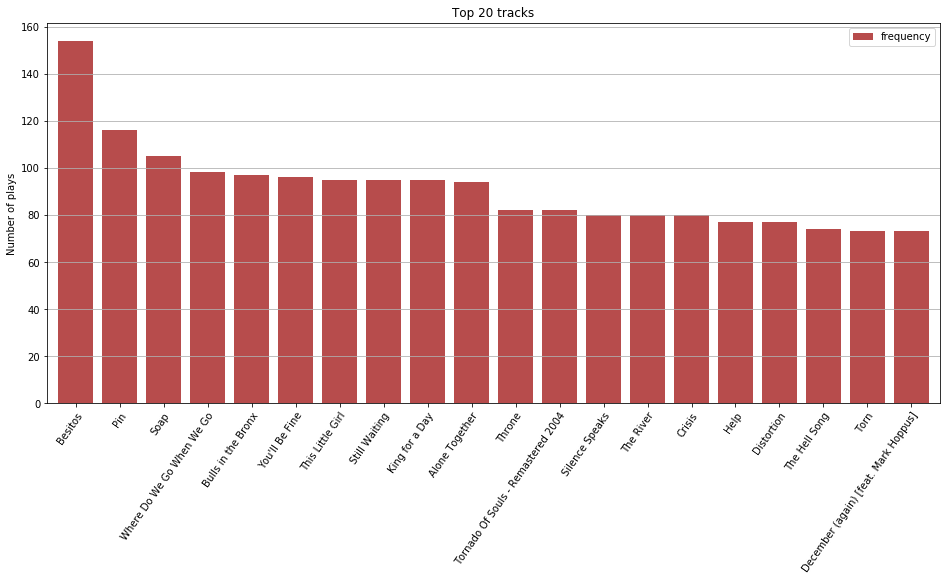

In [12]:
ax = track_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(track_df.index,rotation=55, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 tracks')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

creating album_df to get number of plays from each artist

In [13]:
album_df = scrobbles_df.groupby(['album_name']).size().reset_index()
album_df.rename(columns={0: 'frequency'}, inplace=True)
album_df.set_index(['album_name'], inplace=True)
album_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(album_df.head(5).to_html()))

,frequency
album_name,
Cry Baby (Deluxe),495
Art Angels,278
Collide With the Sky,245
Hybrid Theory (Bonus Track Version),230
The Peace and the Panic,226


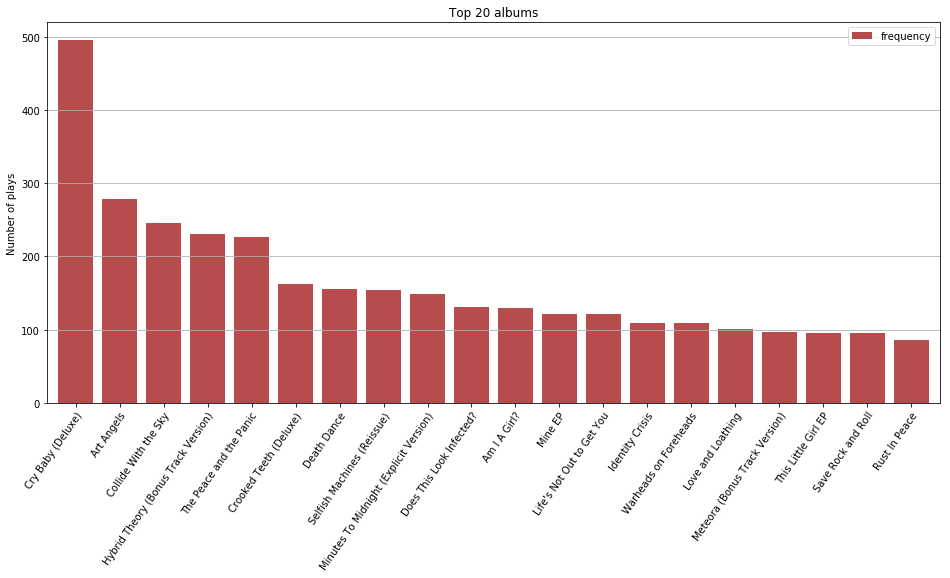

In [14]:
ax = album_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(album_df.index,rotation=55, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 albums')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

creating genre_df to get number of plays from each artist

In [15]:
genre_df = scrobbles_df.groupby(['genre_name']).size().reset_index()
genre_df.rename(columns={0: 'frequency'}, inplace=True)
genre_df.set_index(['genre_name'], inplace=True)
genre_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(genre_df.head(5).to_html()))

,frequency
genre_name,
dance pop,2389
alternative metal,2340
anthem emo,1247
modern alternative rock,613
pop punk,604


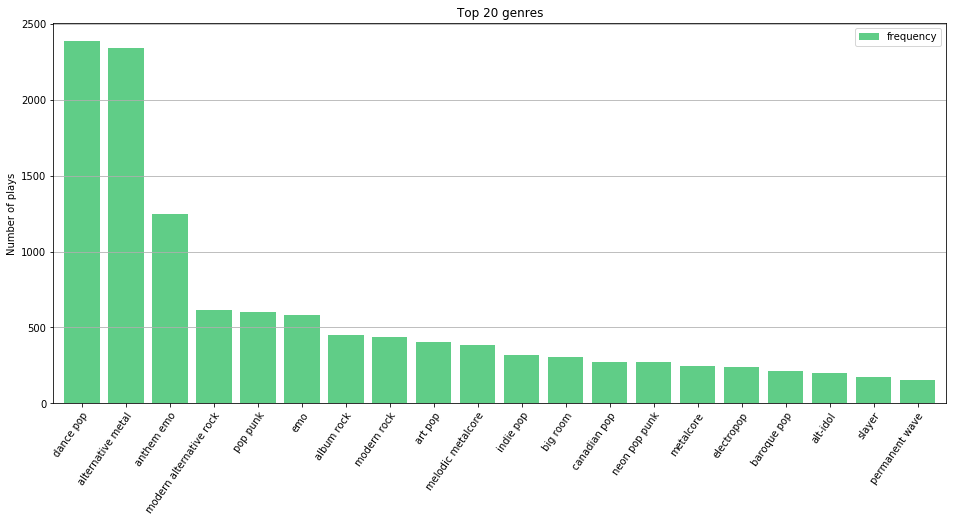

In [16]:
ax = genre_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#1db954')
ax.yaxis.grid(True)
ax.set_xticklabels(genre_df.index,rotation=55, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 genres')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

#### Listening habits

Tracks listened by the hour of day

In [17]:
hour = pd.DataFrame()

hour['hour'] = sorted(scrobbles_df['datetime'].dt.hour.unique())
hour['h_freq'] = scrobbles_df['datetime'].dt.hour.value_counts(sort=True)
hour = hour.set_index('hour')['h_freq']
print(hour.head(25))

hour
0      622
1      309
2      137
3       89
4       51
5       43
6       72
7     2790
8      393
9      148
10     223
11     402
12     378
13     755
14     644
15    1428
16    2952
17     642
18     298
19     475
20     863
21     617
22     655
23     840
Name: h_freq, dtype: int64


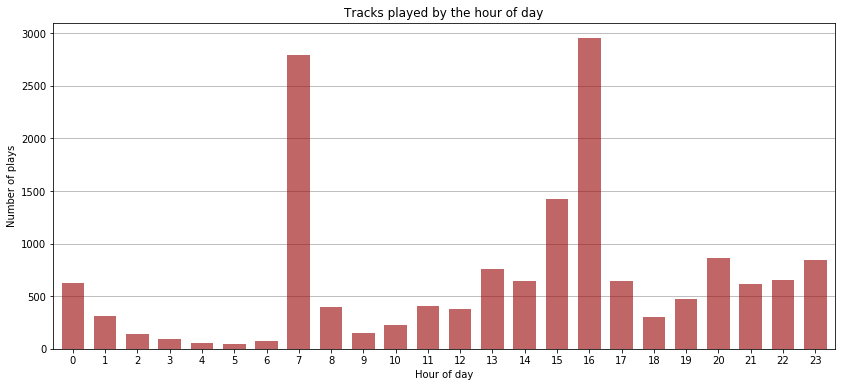

In [31]:
ax = hour.plot(kind='bar', figsize=[14, 6], width=0.7, alpha=0.6, color='#990000', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(hour.index, rotation=0)

#ax.set_ylim((0, 2000))
ax.set_title('Tracks played by the hour of day')
ax.set_xlabel('Hour of day')
ax.set_ylabel('Number of plays')

plt.show()

Tracks listened by the day of the week

In [19]:
week_df = pd.DataFrame()
dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

week_df['int_day'] = scrobbles_df['datetime'].dt.dayofweek
week_df = week_df.groupby(['int_day']).size().reset_index()
week_df.rename(columns={0: 'frequency'}, inplace=True)
week_df['day_name'] = week_df['int_day'].map(dayOfWeek)
week_df.set_index(['day_name'], inplace=True)
week_df.sort_values("int_day",inplace=True, ascending=True)
week_df.drop(['int_day'],axis=1,inplace=True)
display(HTML(week_df.head(5).to_html()))

,frequency
day_name,
Mon,2735
Tue,2718
Wed,2567
Thu,2508
Fri,2215


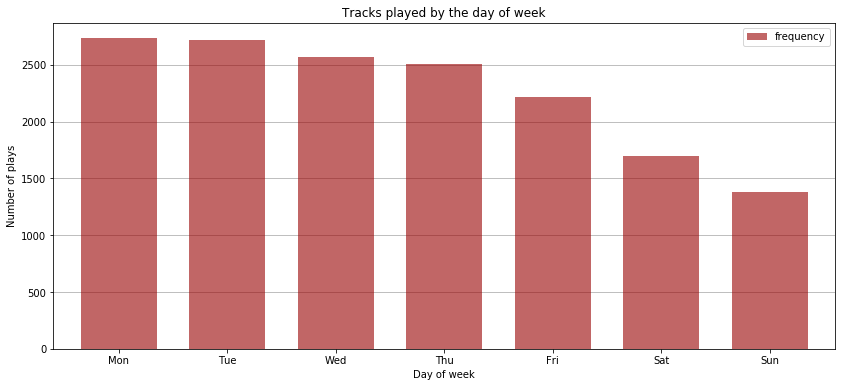

In [34]:
ax = week_df.plot(kind='bar', figsize=[14, 6], width=0.7, alpha=0.6, color='#990000', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(week_df.index, rotation=0)

#ax.set_ylim((0, 2000))
ax.set_title('Tracks played by the day of week')
ax.set_xlabel('Day of week')
ax.set_ylabel('Number of plays')

plt.show()

heatmap for daily activity

In [21]:
date = pd.DataFrame()
date['date'] = pd.to_datetime(scrobbles_df['timestamp'].astype(int), unit='s').dt.date
date['date'] = pd.to_datetime(date['date'])
dateF = date.groupby('date').date.count()
dateF=pd.Series(dateF)
print(dateF.head(5))

date
2017-07-10     7
2017-07-11    27
2017-07-12     4
2017-07-13    22
2017-07-14    12
Name: date, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()
C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()
C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


(<matplotlib.figure.Figure at 0x1c44cca7550>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C44CC927F0>,
       dtype=object))

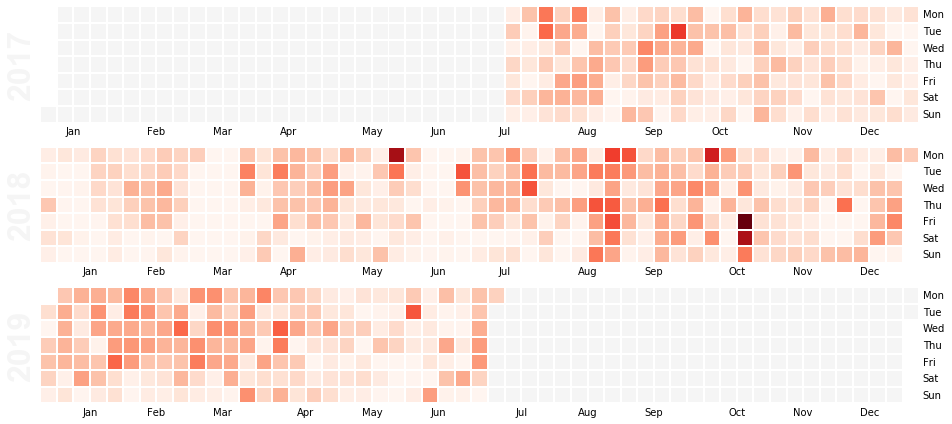

In [22]:
plt.rcParams["figure.figsize"]=14,6
cm.calendarplot(dateF)

### Total listening time

In [23]:
print("Mean tracks listened per day : "+str(round(dateF.mean())))
listeningTime_totalms = scrobbles_df['lengthMS'].sum()
listeningTime_totals = str(round((listeningTime_totalms / 1000) % 60))
listeningTime_totalmin = str(round(((listeningTime_totalms / (1000*60)) % 60)))
listeningTime_totalhrs   = str(round((listeningTime_totalms / (1000*60*60)) % 24))
listeningTime_totaldays = str(round((listeningTime_totalms / (1000*60*60*24))))

print(listeningTime_totaldays+" days")
print(listeningTime_totalhrs+" hrs")
print(listeningTime_totalmin+" mins")

Mean tracks listened per day 25
39.0 days
4.0 hrs
18.0 mins


#### Extracting data for billboard hot 100 playlist for use as a baseline of comparison

In [24]:
billboard_df = lf.get_playlist(user='billboard.com', playlist_id='6UeSakyzhiEt4NB3UAd6NQ')
display(HTML(billboard_df.head(5).to_html()))



Fetching playlist


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.28it/s]



Fetching audio features for tracks


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


tracks without audio features : 0


,track,trackID,artist,artistID,genre,lengthMS,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
0,Old Town Road - Remix,6u7jPi22kF8CTQ3rb9DHE7,Lil Nas X,7jVv8c5Fj3E9VhNjxT4snq,country rap,157066,98,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.1130,0.00,0.639,136.041
1,Señorita,0TK2YIli7K1leLovkQiNik,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,canadian pop,190960,99,0.759,0.540,9,-6.039,0,0.0287,0.0370,0.0945,0.00,0.750,116.947
2,bad guy,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,electropop,194087,99,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.1000,0.13,0.562,135.128
3,Talk,0rTV5WefWd1J3OwIheTzxM,Khalid,6LuN9FCkKOj5PcnpouEgny,pop,197487,86,0.900,0.400,0,-8.443,1,0.1240,0.0501,0.0876,0.00,0.338,136.001
4,I Don't Care (with Justin Bieber),3HVWdVOQ0ZA45FuZGSfvns,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,pop,219946,100,0.798,0.675,6,-5.041,1,0.0442,0.0912,0.0894,0.00,0.842,101.956


In [25]:
billboard_df.describe()

,lengthMS,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,197206.150000,83.090000,0.711620,0.632720,4.740000,-5.713200,0.650000,0.123224,0.197282,0.162540,5.533449e-03,0.507657,119.456010
std,33145.224855,11.194421,0.124063,0.142052,3.398217,1.840953,0.479372,0.115987,0.194106,0.115437,4.116045e-02,0.216446,29.572375
min,114893.000000,24.000000,0.423000,0.321000,0.000000,-11.713000,0.000000,0.028000,0.001240,0.057400,0.000000e+00,0.089700,70.142000
25%,176736.250000,78.000000,0.627000,0.523750,1.000000,-6.781250,0.000000,0.044575,0.048250,0.092550,0.000000e+00,0.344750,95.927250
50%,192789.500000,84.500000,0.725500,0.632500,5.000000,-5.575000,1.000000,0.069000,0.125500,0.123500,0.000000e+00,0.489000,115.362500
75%,215070.750000,90.000000,0.795250,0.731000,8.000000,-4.639250,1.000000,0.155250,0.324250,0.191000,2.675000e-07,0.656250,140.036750
max,312820.000000,100.000000,0.948000,0.904000,11.000000,-2.232000,1.000000,0.588000,0.816000,0.795000,3.910000e-01,0.952000,202.006000


genres in Billboard Hot 100

In [26]:
BBgenre_df = pd.DataFrame()
BBgenre_df['genre'] = billboard_df['genre']
BBgenre_df = billboard_df.groupby(['genre']).size().reset_index()
BBgenre_df.rename(columns={0: 'frequency'}, inplace=True)
BBgenre_df.set_index(['genre'], inplace=True)
BBgenre_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(BBgenre_df.head(5).to_html()))

,frequency
genre,
contemporary country,18
dance pop,15
pop,11
hip hop,6
boy band,4


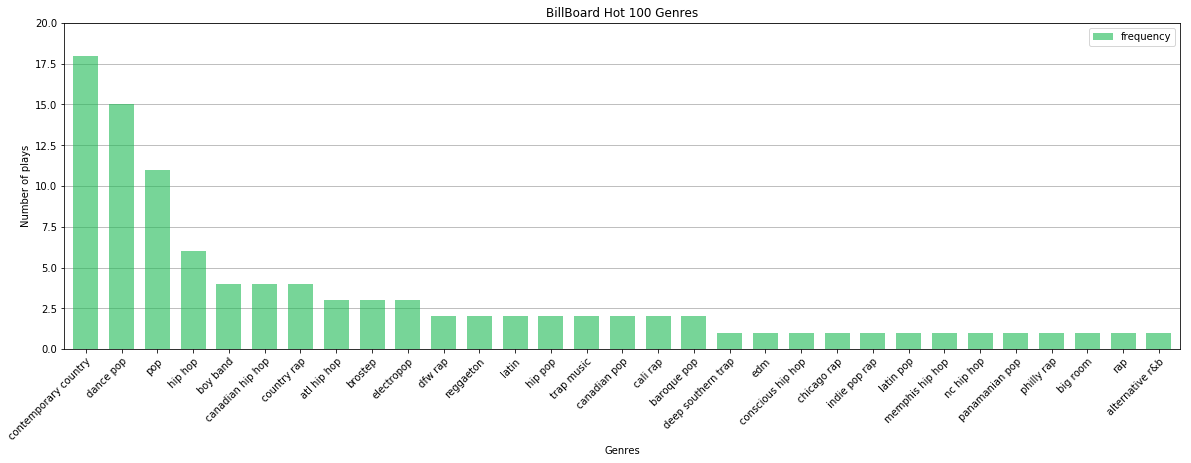

In [27]:
ax = BBgenre_df.plot(kind='bar', figsize=[20, 6], width=0.7, alpha=0.6, color='#1db954', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(BBgenre_df.index, rotation=45, rotation_mode='anchor', ha='right')
ax.set_ylim((0, 20))
ax.set_title('BillBoard Hot 100 Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of plays')

plt.show()

# The top 1%

In [28]:
def top (ser):
    total=len(ser)
    #print(total)
    tp = int(round ((0.01*total)))
    #print(tp)
    res = ser.head(tp).sum()
    return res
def topPC(ser):
    total=len(ser)
    #print(total)
    tp = int(round ((0.01*total)))
    #print(tp)
    res = ser.head(tp).sum()
    pc=((res/len(scrobblesDF.index))*100)
    return pc
def onePC(df):
    total=len(df.index)
    tp = int(round((0.01*total)))
    #print(tp)
    return tp
def AEP(ser):
    #print(ser.head(50))
    slope = (ser[0]-ser[49])/50
    #print(slope)
    avg = ser.head(50).mean()
    #print(avg)
    score = 5-(slope/avg)*25
    return round(score,2)

## AEP and Diversity

### AEP
> The AEP [Anti Exponential Points] is a number that is between -20 and 5 that shows how much preference a last.fm user has for his or her top artists or tracks. 5 is the max value for the AEP and it takes this value when the user has listened all the 50 top artists an equal number of times.

### Diversity
> Similar to AEP but for genres.

#### AEP Formula

 > AEP = 5 - 25 * ( Slope / AverageTop50 )

 > Slope = (value of the first artist in the chart - value of the 50th artist in the chart) / 50

 > AverageTop50 = ( The sum of all values in the top 50 ) / 50

In [29]:
print("Diversity for genres "+str(AEP(genre_df['frequency'])))
print("AEP for artists "+str(AEP(artist_df['frequency'])))
print("AEP for tracks "+str(AEP(track_df['frequency'])))

Diversity for genres 0.91
AEP for artists 3.32
AEP for tracks 4.34


show rows with no audio features

In [48]:
library_df[library_df['tempo'].isnull()]

,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo


Dropping rows without audio features

In [43]:
library_df = library_df[pd.notnull(library_df['tempo'])]
display(HTML(lf.unmapped_tracks(library_df).head(5).to_html()))

,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo


## Audio feature analysis

### Tempo

> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean tempo for top 1% of tracks 128.58
Mean tempo for all listened tracks 126.94
Mean tempo for BillBoard Hot 100 tracks 119.46


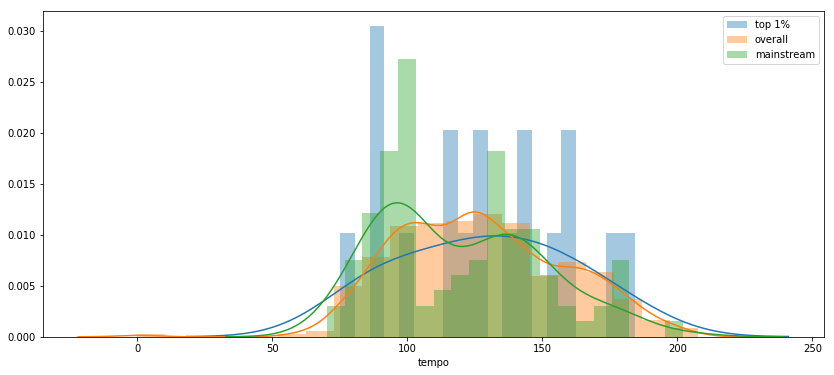

In [53]:
sns.distplot(library_df['tempo'].head(onePC(library_df)),label='top 1%',hist=True,bins=20,norm_hist=True)
sns.distplot(library_df['tempo'],label='overall',hist=True,bins=20,norm_hist=True)
sns.distplot(billboard_df['tempo'],label='mainstream',hist=True,bins=20,norm_hist=True)
print("Mean tempo for top 1% of tracks "+str(round(library_df['tempo'].head(onePC(library_df)).mean(),2)))
print("Mean tempo for all listened tracks "+str(round(library_df['tempo'].mean(),2)))
print("Mean tempo for BillBoard Hot 100 tracks "+str(round(billboard_df['tempo'].mean(),2)))
plt.legend()

### Energy

> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean energy for top 1% of tracks 0.77
Mean energy for all listened tracks 0.78
Mean energy for BillBoard Hot 100 tracks 0.63


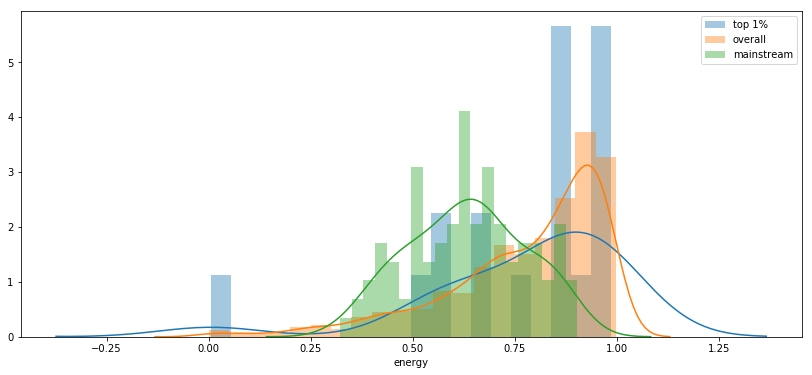

In [54]:
sns.distplot(library_df['energy'].head(onePC(library_df)),label='top 1%',hist=True,bins=20,norm_hist=True)
sns.distplot(library_df['energy'],label='overall',hist=True,bins=20,norm_hist=True)
sns.distplot(billboard_df['energy'],label='mainstream',hist=True,bins=20,norm_hist=True)
print("Mean energy for top 1% of tracks "+str(round(library_df['energy'].head(onePC(library_df)).mean(),2)))
print("Mean energy for all listened tracks "+str(round(library_df['energy'].mean(),2)))
print("Mean energy for BillBoard Hot 100 tracks "+str(round(billboard_df['energy'].mean(),2)))
plt.legend()

### Loudness

> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean loudness for top 1% of tracks -6.98
Mean loudness for all listened tracks -5.77
Mean loudness for BillBoard Hot 100 tracks -5.71


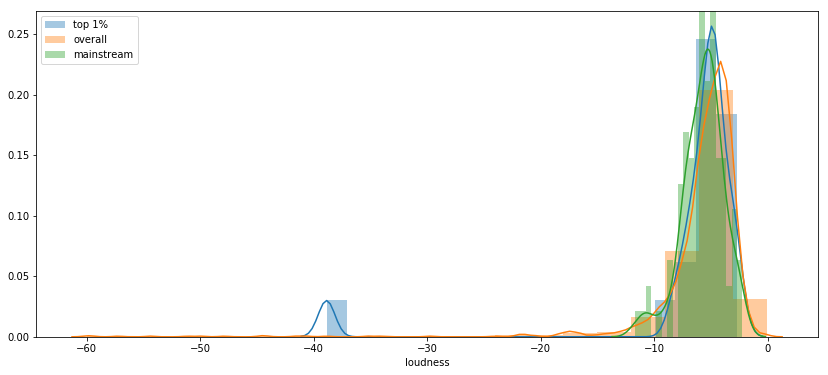

In [56]:
sns.distplot(library_df['loudness'].head(onePC(library_df)),label='top 1%',hist=True,bins=20,norm_hist=True)
sns.distplot(library_df['loudness'],label='overall',hist=True,bins=20,norm_hist=True)
sns.distplot(billboard_df['loudness'],label='mainstream',hist=True,bins=20,norm_hist=True)
print("Mean loudness for top 1% of tracks "+str(round(library_df['loudness'].head(onePC(library_df)).mean(),2)))
print("Mean loudness for all listened tracks "+str(round(library_df['loudness'].mean(),2)))
print("Mean loudness for BillBoard Hot 100 tracks "+str(round(billboard_df['loudness'].mean(),2)))
plt.legend()

### Valence

> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean valence for top 1% of tracks 0.44
Mean valence for all listened tracks 0.46
Mean valence for BillBoard Hot 100 tracks 0.51


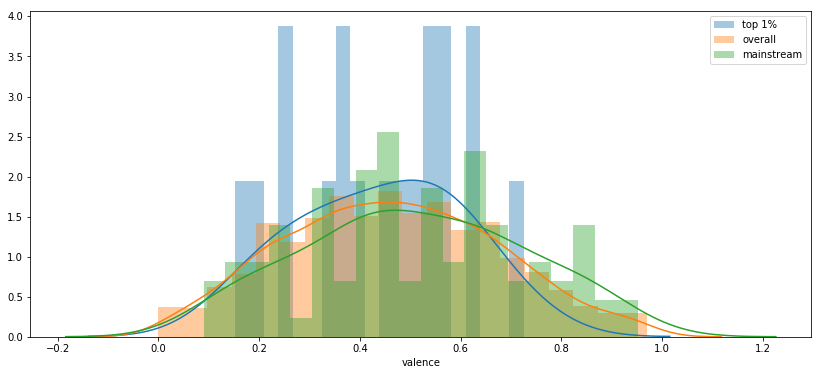

In [57]:
sns.distplot(library_df['valence'].head(onePC(library_df)),label='top 1%',hist=True,bins=20,norm_hist=True)
sns.distplot(library_df['valence'],label='overall',hist=True,bins=20,norm_hist=True)
sns.distplot(billboard_df['valence'],label='mainstream',hist=True,bins=20,norm_hist=True)
print("Mean valence for top 1% of tracks "+str(round(library_df['valence'].head(onePC(library_df)).mean(),2)))
print("Mean valence for all listened tracks "+str(round(library_df['valence'].mean(),2)))
print("Mean valence for BillBoard Hot 100 tracks "+str(round(billboard_df['valence'].mean(),2)))
plt.legend()

### Danceability

> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. High values for danceability correspond to more "repetitiveness"
in the song 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean danceability for top 1% of tracks 0.53
Mean danceability for all listened tracks 0.54
Mean danceability for BillBoard Hot 100 tracks 0.71


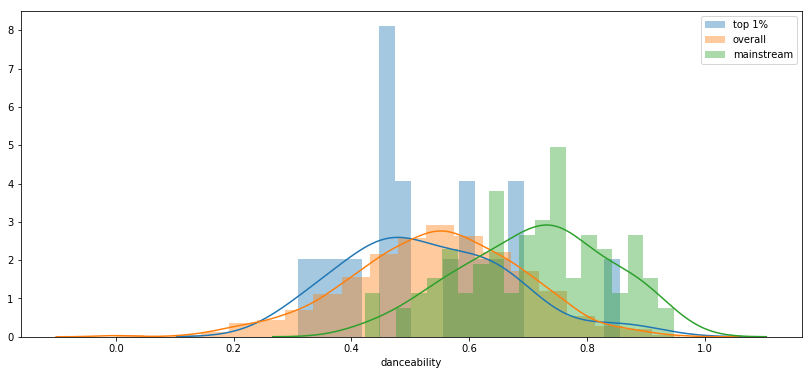

In [58]:
sns.distplot(library_df['danceability'].head(onePC(library_df)),label='top 1%',hist=True,bins=20,norm_hist=True)
sns.distplot(library_df['danceability'],label='overall',hist=True,bins=20,norm_hist=True)
sns.distplot(billboard_df['danceability'],label='mainstream',hist=True,bins=20,norm_hist=True)
print("Mean danceability for top 1% of tracks "+str(round(library_df['danceability'].head(onePC(library_df)).mean(),2)))
print("Mean danceability for all listened tracks "+str(round(library_df['danceability'].mean(),2)))
print("Mean danceability for BillBoard Hot 100 tracks "+str(round(billboard_df['danceability'].mean(),2)))
plt.legend()

### Acousticness

> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic i.e absence of music produced through electric instruments (electic guitar, synthesizer etc.)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean acousticness for top 1% of tracks 0.09
Mean acousticness for all listened tracks 0.11
Mean acousticness for BillBoard Hot 100 tracks 0.2


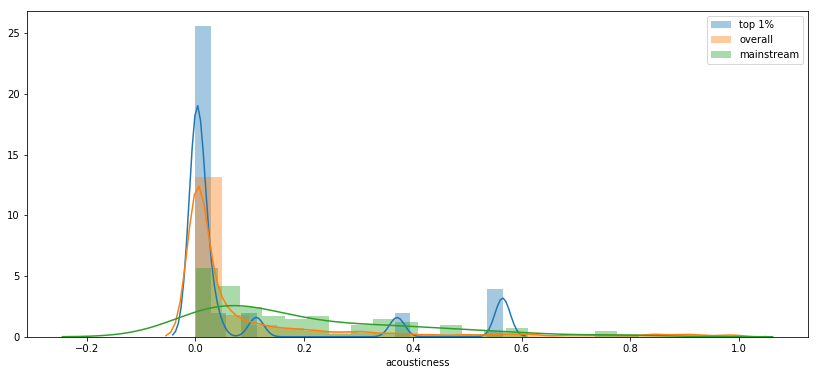

In [59]:
sns.distplot(library_df['acousticness'].head(onePC(library_df)),label='top 1%',hist=True,bins=20,norm_hist=True)
sns.distplot(library_df['acousticness'],label='overall',hist=True,bins=20,norm_hist=True)
sns.distplot(billboard_df['acousticness'],label='mainstream',hist=True,bins=20,norm_hist=True)
print("Mean acousticness for top 1% of tracks "+str(round(library_df['acousticness'].head(onePC(library_df)).mean(),2)))
print("Mean acousticness for all listened tracks "+str(round(library_df['acousticness'].mean(),2)))
print("Mean acousticness for BillBoard Hot 100 tracks "+str(round(billboard_df['acousticness'].mean(),2)))
plt.legend()

### Speechiness
> 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The distribution of values for this feature look like this:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean speechiness for top 1% of tracks 0.11
Mean speechiness for all listened tracks 0.08
Mean speechiness for BillBoard Hot 100 tracks 0.12


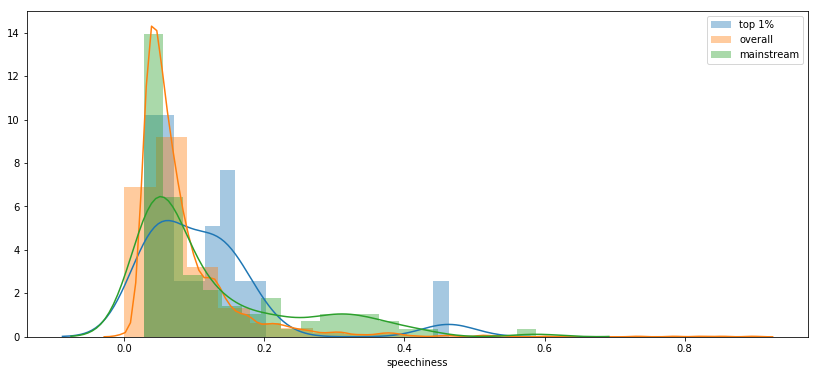

In [60]:
sns.distplot(library_df['speechiness'].head(onePC(library_df)),label='top 1%',hist=True,bins=20,norm_hist=True)
sns.distplot(library_df['speechiness'],label='overall',hist=True,bins=20,norm_hist=True)
sns.distplot(billboard_df['speechiness'],label='mainstream',hist=True,bins=20,norm_hist=True)
print("Mean speechiness for top 1% of tracks "+str(round(library_df['speechiness'].head(onePC(library_df)).mean(),2)))
print("Mean speechiness for all listened tracks "+str(round(library_df['speechiness'].mean(),2)))
print("Mean speechiness for BillBoard Hot 100 tracks "+str(round(billboard_df['speechiness'].mean(),2)))
plt.legend()

### Popularity

> The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean popularity for top 1% of tracks 50.89
Mean popularity for all listened tracks 53.8
Mean popularity for BillBoard Hot 100 tracks 83.09


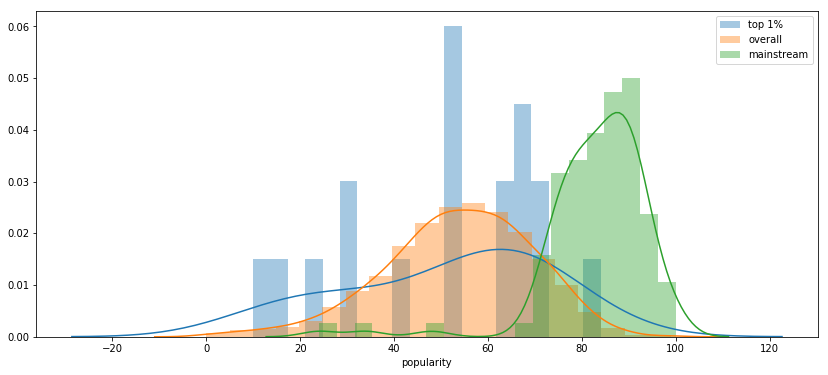

In [61]:
sns.distplot(library_df['popularity'].head(onePC(library_df)),label='top 1%',hist=True,bins=20,norm_hist=True)
sns.distplot(library_df['popularity'],label='overall',hist=True,bins=20,norm_hist=True)
sns.distplot(billboard_df['popularity'],label='mainstream',hist=True,bins=20,norm_hist=True)
print("Mean popularity for top 1% of tracks "+str(round(library_df['popularity'].head(onePC(library_df)).mean(),2)))
print("Mean popularity for all listened tracks "+str(round(library_df['popularity'].mean(),2)))
print("Mean popularity for BillBoard Hot 100 tracks "+str(round(billboard_df['popularity'].mean(),2)))
plt.legend()

## Box plots for library_df

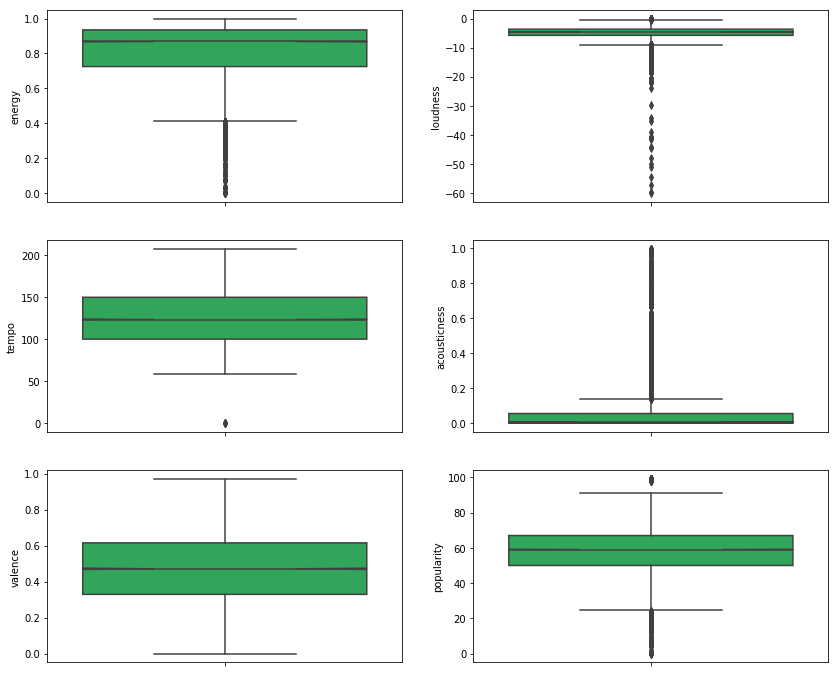

In [62]:
f, ax = plt.subplots(3,2,figsize=(14,12))
sns.boxplot(y=scrobbles_df['energy'],data=scrobbles_df,notch=True,color='#1db954',ax=ax[0][0])
sns.boxplot(y=scrobbles_df['tempo'],data=scrobbles_df,notch=True,color='#1db954',ax=ax[1][0])
sns.boxplot(y=scrobbles_df['valence'],data=scrobbles_df,notch=True,color='#1db954',ax=ax[2][0])
sns.boxplot(y=scrobbles_df['loudness'],data=scrobbles_df,notch=True,color='#1db954',ax=ax[0][1])
sns.boxplot(y=scrobbles_df['acousticness'],data=scrobbles_df,notch=True,color='#1db954',ax=ax[1][1])
sns.boxplot(y=scrobbles_df['popularity'],data=scrobbles_df,notch=True,color='#1db954',ax=ax[2][1])
